In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
property_dict = {
    "A": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "R": ["Polar", "Positive", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "N": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "D": ["Polar", "Negative", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "C": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "Q": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "E": ["Polar", "Negative", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "G": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "H": ["Polar", "Positive", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "I": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "L": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "K": ["Polar", "Positive", 'Hydrophilic', 'NonAromatic', 'Ionizable'],
    "M": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "F": ["NonPolar", 'Neutral', 'Hydrophobic', "Aromatic", 'NonIonizable'],
    "P": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable'],
    "S": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "T": ["Polar", 'Neutral', 'Hydrophilic', 'NonAromatic', 'NonIonizable'],
    "W": ["NonPolar", 'Neutral', 'Hydrophobic', "Aromatic", 'NonIonizable'],
    "Y": ["Polar", 'Neutral', 'Hydrophobic', "Aromatic", 'Ionizable'],
    "V": ["NonPolar", 'Neutral', 'Hydrophobic', 'NonAromatic', 'NonIonizable']
}

mapping = {'Hydrophobic':0, 'Hydrophilic':1, 'Neutral':0, 'Positive':1, 'Negative':-1, 'Polar':1, 'NonPolar':0, 'Aromatic':1, 'NonAromatic':0, 'Ionizable':1, 'NonIonizable':0}



In [3]:
data_path = "data"

In [4]:
data = pd.read_csv(os.path.join(data_path, "data_struct_features.csv"))

In [11]:
data.head()

,Unnamed: 0,our_id,metadata,position,amino_acid,data,labels
0,0,0,1AHW_ED C 4,0,t,"[[0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0....",0
1,1,0,1AHW_ED C 4,1,n,"[[0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0....",0
2,2,0,1AHW_ED C 4,2,t,"[[0.5, 0.5, 0.5, 0.5, 0.5], [0.5, 0.5, 0.5, 0....",0
3,3,0,1AHW_ED C 4,3,v,"[[0.5, 0.5, 0.5, 0.5, 0.5], [1.0, 0.0, 1.0, 0....",0
4,4,0,1AHW_ED C 4,4,a,"[[1.0, 0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0....",0


In [29]:
def get_train_test(df, train_size, test_size, val_size):
    # first select train and test samples
    inds = np.random.permutation(len(np.unique(df["our_id"])))
    train_inds = inds[:int(train_size*len(inds))]
    test_inds = inds[int(train_size*len(inds)): int(train_size*len(inds))+int(test_size*len(inds))]
    val_inds = inds[int(train_size*len(inds))+int(test_size*len(inds)):]
    
    train_data = df[df['our_id'].isin(train_inds)]
    test_data = df[df['our_id'].isin(test_inds)]
    val_data = df[df['our_id'].isin(val_inds)]

    x_train = np.array([eval(d) for d in train_data["data"].values])
    y_train = np.array(train_data["labels"])
    x_test = np.array([eval(d) for d in test_data["data"].values])
    y_test = np.array(test_data["labels"])
    x_val = np.array([eval(d) for d in val_data["data"].values])
    y_val = np.array(val_data["labels"])

    print("number of protein sequences:", len(train_inds), len(test_inds), len(val_inds))
    print("train:", x_train.shape, y_train.shape,"val:", x_val.shape, y_val.shape, "test:", x_test.shape, y_test.shape)
    return x_train, y_train, x_val, y_val, x_test, y_test

In [30]:
train_size = 0.7
test_size = 0.2
val_size = 0.1
x_train, y_train, x_val, y_val, x_test, y_test = get_train_test(data, train_size, test_size, val_size)

number of protein sequences: 181 51 27
train: (41994, 9, 5) (41994,) val: (6429, 9, 5) (6429,) test: (13003, 9, 5) (13003,)


### 

In [13]:
from tensorflow import keras

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv1D, MaxPooling1D

In [18]:
window_size = 9
n_features = 5

epochs = 10
batch_size = 16

In [31]:
# START CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(window_size,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(Dropout(0.5))
# model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
41994/41994 [==============================] - 8s 181us/sample - loss: 0.0800 - acc: 0.9130
Epoch 2/10
41994/41994 [==============================] - 7s 170us/sample - loss: 0.0788 - acc: 0.9134
Epoch 3/10
41994/41994 [==============================] - 7s 165us/sample - loss: 0.0782 - acc: 0.9134
Epoch 4/10
41994/41994 [==============================] - 7s 163us/sample - loss: 0.0772 - acc: 0.9137
Epoch 5/10
41994/41994 [==============================] - 7s 171us/sample - loss: 0.0758 - acc: 0.9141
Epoch 6/10
41994/41994 [==============================] - 7s 161us/sample - loss: 0.0741 - acc: 0.9150
Epoch 7/10
41994/41994 [==============================] - 7s 178us/sample - loss: 0.0724 - acc: 0.9168
Epoch 8/10
41994/41994 [==============================] - 7s 158us/sample - loss: 0.0707 - acc: 0.9186
Epoch 9/10
41994/41994 [==============================] - 6s 154us/sample - loss: 0.0691 - acc: 0.9201
Epoch 10/10
41994/41994 [

In [21]:
x_train.shape

(42737,)

In [33]:
# evaluate model
_, accuracy = model.evaluate(x_val, y_val, batch_size=batch_size, verbose=0)
print("accuracy", accuracy)

accuracy 0.9026287


In [34]:
out = model.predict(x_val)

In [36]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score

In [38]:
roc_auc_score(y_val, out)

0.5438906318585551

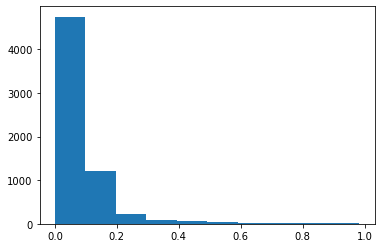

In [39]:
plt.hist(out)
plt.show()